# **ANN (Artificial Neural Network)**
* An Artificial Neural Network (ANN) is a computing system inspired by the structure and function of the human brain. 
* It consists of layers of interconnected neurons that process information in a way similar to biological neural networks.
* Artificial Neural Networks contain artificial neurons which are called units . These units are arranged in a series of layers that together constitute the whole Artificial Neural Network in a system.
---

### **Structure of an ANN**:
An ANN typically consists of three types of layers:

1. **Input Layer**:
   - The input layer is the first layer of the network.
   - It receives raw data in the form of numerical values, such as pixel intensities for images or numerical features for tabular data.
   - Each neuron in the input layer corresponds to one feature of the input data.

2. **Hidden Layer(s)**:
   - These layers are responsible for learning patterns and representations from the input data.
   - Each hidden layer consists of neurons that apply weights, biases, and activation functions to the inputs.
   - The number of hidden layers and neurons in each layer can vary depending on the complexity of the problem.
   - **Deep Neural Networks (DNNs)** are ANNs with multiple hidden layers.

3. **Output Layer**:
   - The output layer provides the final result of the network, such as a classification label, regression value, or probability distribution.
   - The number of neurons in the output layer depends on the task:
     - For binary classification: 1 neuron with a sigmoid activation function.
     - For multi-class classification: Number of neurons = Number of classes, with a softmax activation function.
     - For regression: 1 neuron with a linear activation function.

     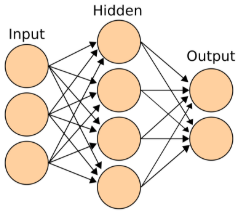

---    

### **Working Mechanism of an ANN**:
ANNs operate in two main phases: forward propagation and backpropagation.
   1. **Forward Propagation**:
      1. Each neuron receives inputs.
      2. Inputs are weighted and passed through an activation function.
      3. The output is passed to the next layer.
      4. This continues until the final layer produces a prediction. 
      
      Mathematically the output of a neuron is:

         
         
         Where:
            𝑊 = Weights (learnable parameters), 
            𝑋 = Input values, 
            𝑏 = Bias term, 
            𝑓 = Activation function, 
            𝑦 = Output

   2. **Backpropagation**:
      Backpropagation is used to adjust weights and minimize the error in predictions.

      1. Loss Function: Measures how far predictions are from actual values.
         * Mean Squared Error (MSE) for regression
         * Cross-Entropy Loss for classification
      2. Gradient Descent: Optimizes weights using derivatives.
         * Adjusts weights in the opposite direction of the gradient.
         * Learning rate (𝜂) controls step size.
      3. Weight Update Formula:

         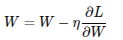

            Where:
               𝑊 = Weight, 
               𝜂 = Learning rate, 
               ∂𝐿/∂𝑊 = Gradient of loss function
      4. Iteration (Epochs): The process is repeated until convergence.     

--- 

### **Activation Functions**:
Activation functions introduce non-linearity into the network, enabling it to learn complex patterns. Common activation functions include:

1. **Sigmoid**:
   - Formula: \( f(x) = \frac{1}{1 + e^{-x}} \)
   - Output range: (0, 1)
   - Commonly used in the output layer for binary classification.

2. **ReLU (Rectified Linear Unit)**:
   - Formula: \( f(x) = \max(0, x) \)
   - Output range: [0, ∞)
   - Most widely used in hidden layers due to its simplicity and efficiency.

3. **Tanh (Hyperbolic Tangent)**:
   - Formula: \( f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} \)
   - Output range: (-1, 1)
   - Often used in hidden layers for zero-centered outputs.

4. **Softmax**:
   - Formula: \( f(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}} \)
   - Output range: (0, 1), with all outputs summing to 1.
   - Used in the output layer for multi-class classification.

---

### **Learning Process in an ANN**:
1. **Forward Propagation**:
   - The input data flows through the network layer by layer.
   - Each neuron computes a weighted sum of its inputs, adds a bias term, and applies an activation function.
   - The final output is computed in the output layer.

2. **Loss Function**:
   - The loss function measures the difference between the predicted output and the actual target.
   - Common loss functions:
   - Mean Squared Error (MSE) for regression tasks.
   - Binary Cross-Entropy for binary classification.
   - Categorical Cross-Entropy for multi-class classification.

3. **Backpropagation**:
   - The error from the loss function is propagated backward through the network.
   - Gradients of the loss with respect to weights and biases are computed using the chain rule of calculus.
   - These gradients are used to update the weights and biases.

4. **Optimization**:
   - Optimization algorithms, such as **Stochastic Gradient Descent (SGD)**, **Adam**, or **RMSprop**, are used to minimize the loss function by updating the weights and biases iteratively.

---

### **Types of Artificial Neural Networks (ANNs)**:
1. **Feedforward Neural Networks (FNNs)**:
   - Data flows in one direction, from the input layer to the output layer.
   - No cycles or loops in the network.
   - Used for classification and regression.

2. **Convolutional Neural Networks (CNNs)**:
   - Specially designed for image and video processing.
   - Uses convolutional layers to extract spatial features.
   - Extracts spatial features (e.g., edges, textures).

3. **Recurrent Neural Networks (RNNs)**:
   - Designed for sequential data, such as time series or text.
   - Includes loops to retain information from previous steps.
   - Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) solve memory problems.

4. **Generative Adversarial Networks (GANs)**:
   - Consists of two networks: a generator and a discriminator.
   - Used for generating new data, such as images or text.

5. **Autoencoders**:
   - Unsupervised learning model for dimensionality reduction and anomaly detection.
   - Compresses input into a smaller representation (encoder) and reconstructs it (decoder).

### Python implementation of an Artificial Neural Network (ANN)

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

2025-03-20 16:12:49.630835: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742467369.654073   22192 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742467369.663592   22192 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742467369.682117   22192 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742467369.682137   22192 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742467369.682139   22192 computation_placer.cc:177] computation placer alr

### Load a Data 

In [2]:
data = load_breast_cancer()
X = data.data 
y = data.target 

df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


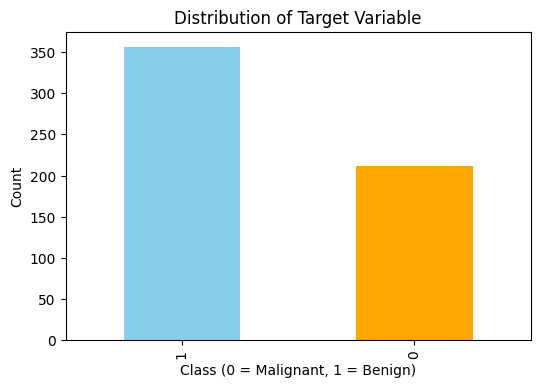

In [3]:
plt.figure(figsize=(6, 4))
df['target'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Target Variable')
plt.xlabel('Class (0 = Malignant, 1 = Benign)')
plt.ylabel('Count')
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Build the model

In [5]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(units=16, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

I0000 00:00:1742467373.101335   22192 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2611 MB memory:  -> device: 0, name: Quadro T1000, pci bus id: 0000:01:00.0, compute capability: 7.5


In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Train the model

In [8]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    batch_size=16,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/50


I0000 00:00:1742467425.202898   22260 service.cc:152] XLA service 0x77df840042a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742467425.202917   22260 service.cc:160]   StreamExecutor device (0): Quadro T1000, Compute Capability 7.5
2025-03-20 16:13:45.231881: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1742467425.435879   22260 cuda_dnn.cc:529] Loaded cuDNN version 90800


16/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6340 - loss: 0.6724

I0000 00:00:1742467426.178976   22260 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.6618 - loss: 0.6454 - val_accuracy: 0.8462 - val_loss: 0.4619
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9153 - loss: 0.3894 - val_accuracy: 0.8901 - val_loss: 0.3225
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9463 - loss: 0.2689 - val_accuracy: 0.9011 - val_loss: 0.2534
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9509 - loss: 0.2005 - val_accuracy: 0.9231 - val_loss: 0.2121
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9361 - loss: 0.1946 - val_accuracy: 0.9231 - val_loss: 0.1828
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9597 - loss: 0.1337 - val_accuracy: 0.9451 - val_loss: 0.1615
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9706 - loss: 0.1209 - val_accuracy: 0.9670 - val_loss: 0.1480
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9764 - loss: 0.0906 - val_accuracy: 0.9780 - val_loss: 0.1359


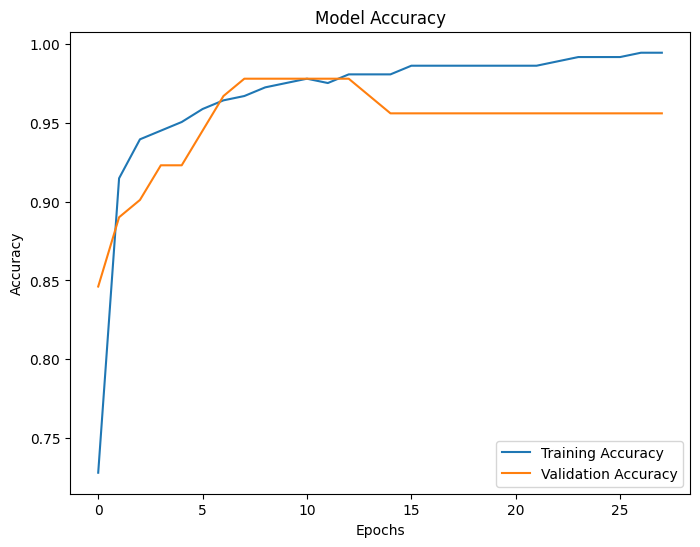

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

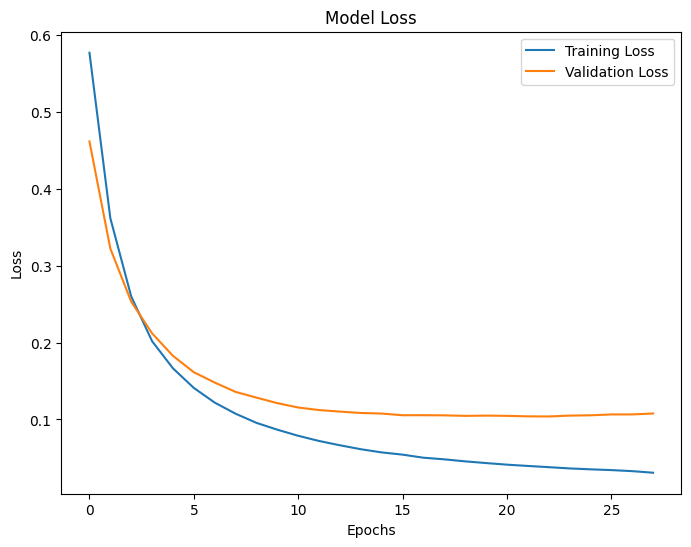

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Evaluate the model

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.9759 - loss: 0.0908
Test Loss: 0.07860913127660751
Test Accuracy: 0.9736841917037964


### Making prediction 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


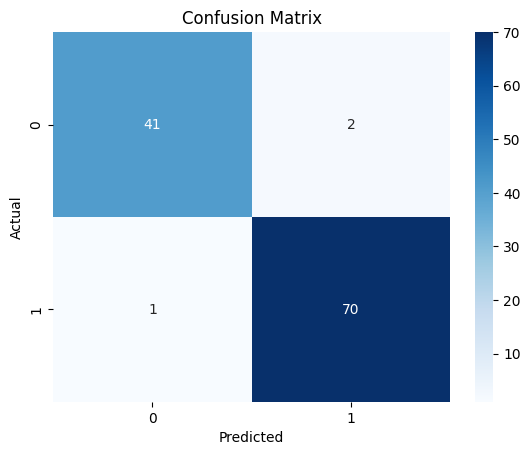

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [12]:
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int).flatten()

cm = confusion_matrix(y_test, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, predicted_classes))